In [ ]:
import repackage
repackage.add("../azure-enterprise-scale-ml/esml/common/")
from esml import ESMLProject
import pandas as pd

p = ESMLProject() # Will search in ROOT for your copied SETTINGS folder '../../../settings', you should copy template settings from '../settings'
p.inference_mode = False

p.active_model = 1 # Must be a MULTI-CLASSIFICATION model for this DEMO
p.ws = p.get_workspace_from_config() #2) Load DEV or TEST or PROD Azure ML Studio workspace
p.connect_to_lake

## `Autosplit` and register as Azure ML Datasets (avoid boring registering work, over and over, `since each project/model needs spliing dat for ML`)

In [ ]:
# GET TESTSET
label = p.active_model["label"]
try:
    p.GoldTest.name
except: 
    p.connect_to_lake()
    train_6, validate_set_2, test_set_2 = p.split_gold_3(0.6,label)

# Multiclass Classification: 2 ways of calculating METRICS. Example: `roc_auc_score`

### Alt A) Get best model via ESML, and `caluclate scoring metrics yourself` (over and over for each project)

In [ ]:
# GET BEST MODEL - accoring to YOU - settings\project_specific\model\model_settings.json
experiment, model,main_run, best_automl_run,fitted_model = p.get_best_model_and_run_via_experiment_name_and_ws(p.ws)

In [10]:
# MANUALLY: Calculate TEST_SET roc_auc_score

from sklearn.metrics import roc_auc_score

X_test = p.GoldTest.to_pandas_dataframe()
y_test = X_test.pop(label).to_frame() # y_test (true labels)
y_predict = fitted_model.predict(X_test) # y_predict (predicted labels)
y_predict_proba = None

if fitted_model is not None and hasattr(fitted_model, 'predict_proba') and fitted_model.predict_proba is not None:
    y_predict_proba = fitted_model.predict_proba(X_test) 
    predict_proba = None
    predict_proba = y_predict_proba[:,1]

multi_class = False
if (multi_class):
    auc = roc_auc_score(y_true=y_test, y_score=y_predict_proba,multi_class='ovr') # ovo
else:
    auc = roc_auc_score(y_test, predict_proba)
    
print("roc_auc_score", auc)

print("And then...you need to log it (not showed here), such as regiser this in Azure ML Studio on model and test_set. ESML alternative does this auto, via TAGS")

roc_auc_score 0.8539046121593292
And then...you need to log it (not showed here), such as regiser this in Azure ML Studio on model and test_set. ESML alternative does this auto


## Alt B) Get best model via ESML, `auto-calucalulation`  (same consistent calulcation, for each project in your organisation)
- Supports both: `Binary` or `Multiclass` classficiaton for roc_auc_score

found model via REMOTE FILTER: Experiment TAGS: model_name


Package:azureml-automl-runtime, training version:1.34.0, current version:1.26.0.post1
Package:azureml-core, training version:1.34.0, current version:1.26.0.post1
Package:azureml-dataprep, training version:2.22.2, current version:2.13.2
Package:azureml-dataprep-native, training version:38.0.0, current version:32.0.0
Package:azureml-dataprep-rslex, training version:1.20.2, current version:1.11.2
Package:azureml-dataset-runtime, training version:1.34.0, current version:1.26.0
Package:azureml-defaults, training version:1.34.0, current version:1.26.0
Package:azureml-interpret, training version:1.34.0, current version:1.26.0
Package:azureml-pipeline-core, training version:1.34.0, current version:1.26.0
Package:azureml-telemetry, training version:1.34.0, current version:1.26.0
Package:azureml-train-automl-client, training version:1.34.0, current version:1.26.0
Package:azureml-train-automl-runtime, training version:1.34.0, current version:1.26.0.post1
Package:azureml-mlflow, training version:1

Replacing tag run_id -> AutoML_7e3ddc93-d7a6-4989-87d2-b538e6a24281 with run_id -> AutoML_7e3ddc93-d7a6-4989-87d2-b538e6a24281
Replacing tag model_name -> AutoML7e3ddc93d7 with model_name -> AutoML7e3ddc93d7
Replacing tag trained_in_environment -> dev with trained_in_environment -> dev
Replacing tag trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls with trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls
Replacing tag experiment_name -> 10_titanic_model_clas with experiment_name -> 10_titanic_model_clas
Replacing tag test_set_ROC_AUC -> 0.853905 with test_set_ROC_AUC -> 0.853905
Replacing tag test_set_Accuracy -> 0.837079 with test_set_Accuracy -> 0.837079
Replacing tag test_set_F1_Score -> 0.794326 with test_set_F1_Score -> 0.794326
Replacing tag test_set_Precision -> 0.721128 with test_set_Precision -> 0.721128
Replacing tag test_set_Recall -> 0.777778 with test_set_Recall -> 0.777778
Replacing tag test_set_Matthews_Correlation -> 0.659953 with test_set_Matthews_Correlation

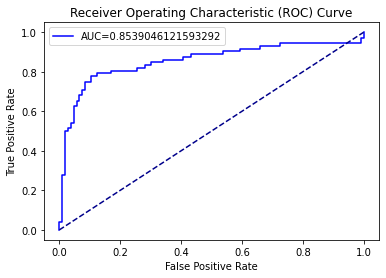

In [6]:
# TEST_SET SCORING - ESML Automatically, 7 metrics
from baselayer_azure_ml import ESMLTestScoringFactory
label = p.active_model["label"]

multi_class = None # 'ovr', 'ovo'
auc,accuracy,f1, precision,recall,matrix,matthews, plt = ESMLTestScoringFactory(p).get_test_scoring_7_classification(label,multi_class) # ovo or ovr for MULTI-CLASSIFICATION

print("AUC:")
print(auc)
print()
print("Accuracy:")
print(accuracy)
print()
print("F1 Score:")
print(f1)
print()
print("Precision:")
print(precision)
print()
print("Recall:")
print(recall)
print()
print("Matthews correlation:")
print(matthews)
print()
print("Confusion Matrix:")
print(matrix)
